In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# нормалтное законы распредления
# матрица кореляции 
# шапиро уилка распрделение
# диспресионный анализ
# гипотеза

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Covid Data.csv')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df.isnull().sum() # Смотрим чтобы не было пропавших элементов

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [5]:
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors ='coerce')
df['DATE_DIED'] = df['DATE_DIED'].dt.date
df


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,2020-03-05,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,2020-03-06,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,2020-09-06,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,2020-12-06,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,NaT,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,NaT,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,NaT,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,NaT,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97


In [6]:
df['STATUS'] = df['DATE_DIED'].copy(deep=False)
df['STATUS'] = df['STATUS'].fillna(1)
df.loc[df['STATUS'] !=1, 'STATUS'] =0 # изучить возможность loc


df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,STATUS
0,2,1,1,1,2020-03-05,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,0
1,2,1,2,1,2020-03-06,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97,0
2,2,1,2,2,2020-09-06,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,0
3,2,1,1,1,2020-12-06,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,0
4,2,1,2,1,NaT,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97,1
1048571,1,13,2,2,NaT,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2,1
1048572,2,13,2,1,NaT,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97,1
1048573,2,13,2,1,NaT,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97,1


In [7]:
count_dead = (df['STATUS'] == 0).sum()
count_live = (df['STATUS'] == 1).sum()
print(count_dead)
print(count_live)

30492
1018083


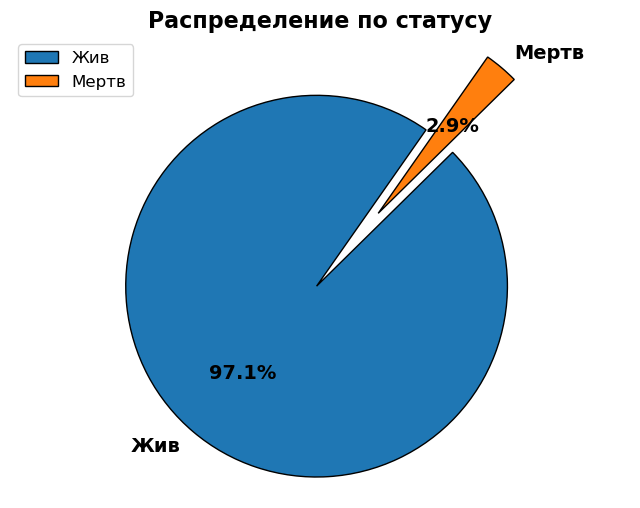

In [8]:
# Круговая  диаграмма сколько живых и мертвых

status_counts = df['STATUS'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    status_counts, 
    labels=['Жив', 'Мертв'], 
    autopct='%1.1f%%', 
    startangle=55,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    textprops={'fontsize': 14, "weight":"bold"},
    explode=[0.5, 0]
    )

plt.title('Распределение по статусу', fontsize=16, weight='bold')
plt.legend(['Жив', 'Мертв'], loc="best", fontsize=12)
plt.axis('equal')  # Чтобы круговая диаграмма была кругом

plt.show()

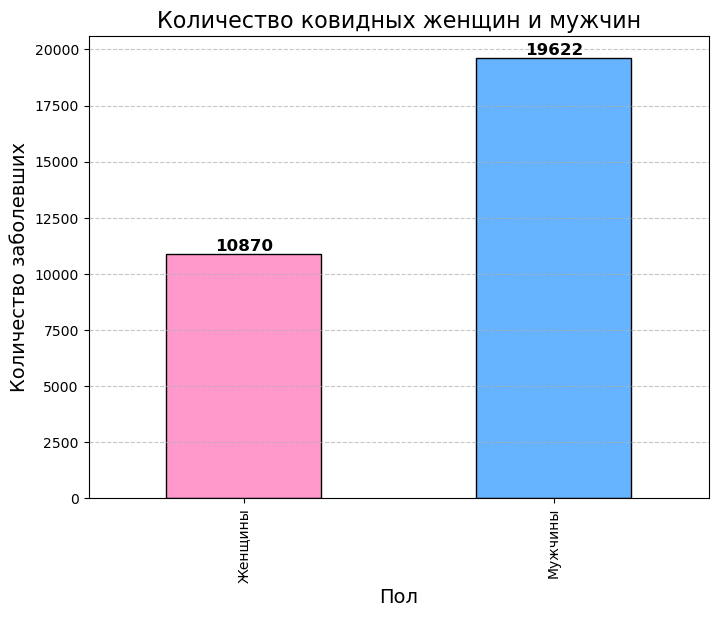

In [9]:
covid_women = df[(df['STATUS'] == 0) & (df['SEX'] == 1)]
covid_men = df[(df['STATUS'] == 0) & (df['SEX'] == 2)]

status_covid_women = covid_women.shape[0]
status_covid_men = covid_men.shape[0]

status_counts = pd.Series([status_covid_women, status_covid_men], index=['Женщины', 'Мужчины'])

plt.figure(figsize=(8, 6))
ax = status_counts.plot(kind='bar', color=['#ff99cc', '#66b3ff'], edgecolor='black')

plt.title('Количество ковидных женщин и мужчин', fontsize=16)
plt.xlabel('Пол', fontsize=14)
plt.ylabel('Количество заболевших', fontsize=14)

# Добавляем подписи к столбцам
for i, count in enumerate(status_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Добавляем сетку для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

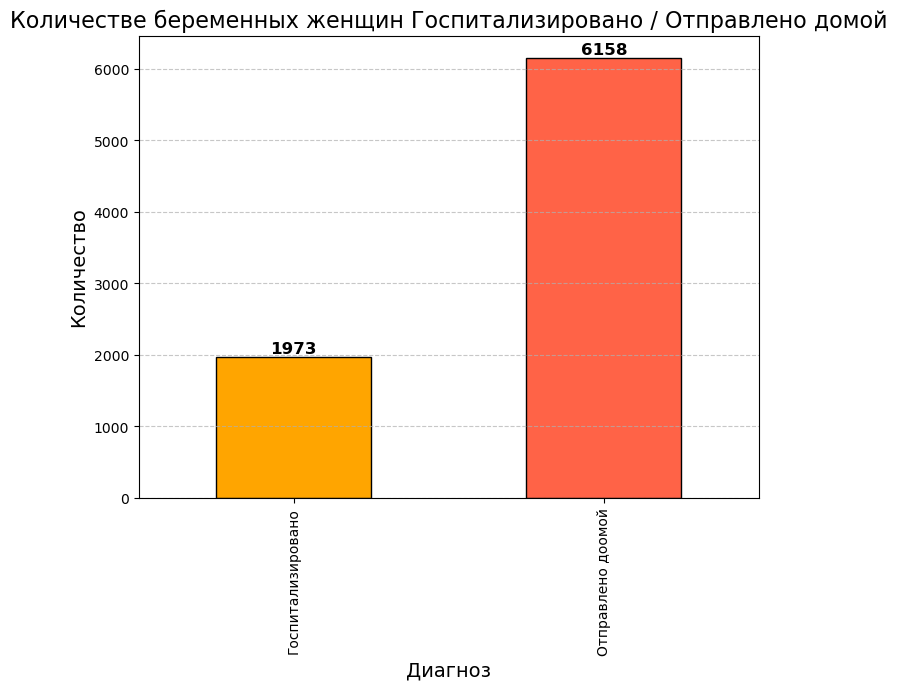

In [10]:
pregnant_women_hospitalized = df[(df['PREGNANT'] == 1) & (df['PATIENT_TYPE'] == 2)]
pregnant_women_home = df[(df['PREGNANT'] == 1) & (df['PATIENT_TYPE'] == 1)]

count_pregnant_hospitalized = pregnant_women_hospitalized.shape[0]
count_pregnant_home = pregnant_women_home.shape[0]

status_pregnant_women = pd.Series([count_pregnant_hospitalized, count_pregnant_home], index=['Госпитализировано', 'Отправлено доомой'])

plt.figure(figsize=(8, 6))
ax = status_pregnant_women.plot(kind='bar', color=['#ffa500', '#ff6347'], edgecolor='black')

plt.title('Количестве беременных женщин Госпитализировано / Отправлено домой', fontsize=16)
plt.xlabel('Диагноз', fontsize=14)
plt.ylabel('Количество', fontsize=14)

# Добавляем подписи к столбцам
for i, count in enumerate(status_pregnant_women):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Можем сделать распределение по возрасту заболевших

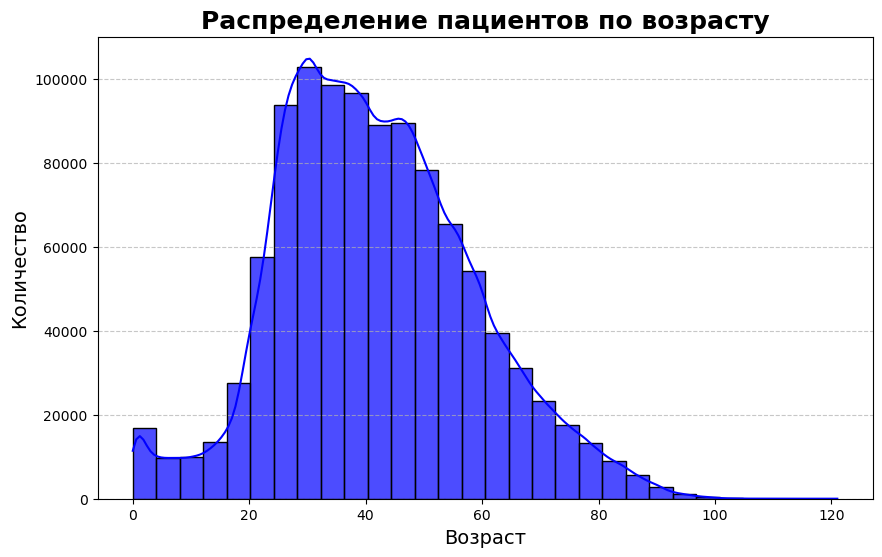

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='AGE', bins=30, kde=True, color='blue', edgecolor='black', alpha=0.7)

plt.title('Распределение пациентов по возрасту', fontsize=18, fontweight='bold')
plt.xlabel('Возраст', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Можем проверить сколько уникальных значений признаков

In [12]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique())) # 121 тип возраста - возможно где-то проблемы, можно убрать возраст который >100

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 151
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4
STATUS =>	 2


In [13]:
df['PREGNANT'].value_counts() # Почему-то 4 типа беременности

PREGNANT
97    523511
2     513179
1       8131
98      3754
Name: count, dtype: int64

#### Видим, что у некоторых столбцов, которые судя по описанию должны иметь бинарные признаки (болен диабетом или нет, беременна или нет), имеют по 3-4 признака. Это можно исправить:

#### SEX:
#### 1 - female. 2 - male (из описания датасета)

In [14]:
print('MALE',df.query('SEX==2')['PREGNANT'].value_counts(), sep='\n') # Статус беременности мужиков

MALE
PREGNANT
97    523511
Name: count, dtype: int64


In [15]:
df['PREGNANT'] = df['PREGNANT'].replace(97,2) # Заменим лишние типы на "2" (предполагая, что статус "2" означаент "не беременна", раз он у большинства женщин)
df['PREGNANT'] = df['PREGNANT'].replace(98,2) 

In [16]:
print('FEMALE',df.query('SEX==1')['PREGNANT'].value_counts(), sep='\n') # Статусы беременности женщин

FEMALE
PREGNANT
2    516933
1      8131
Name: count, dtype: int64


In [17]:
df['PREGNANT'].value_counts()

PREGNANT
2    1040444
1       8131
Name: count, dtype: int64

#### В целом в коде много где встречаются значения [97, 98, 99], которые скорее всего выступают в роли плейсхолдеров для неизвестных значений. В идеале просмотреть все классы где есть подобная проблема и либо заменить их на Nan, либо подогнать под другие значения там где это очевидно (как с беременностью)

In [18]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,STATUS
0,2,1,1,1,2020-03-05,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,0
1,2,1,2,1,2020-03-06,97,1,72,2,2,2,2,2,1,2,2,1,1,2,5,97,0
2,2,1,2,2,2020-09-06,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,0
3,2,1,1,1,2020-12-06,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,0
4,2,1,2,1,NaT,97,2,68,2,1,2,2,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,97,2,40,2,2,2,2,2,2,2,2,2,2,2,7,97,1
1048571,1,13,2,2,NaT,2,2,51,2,2,2,2,2,1,2,2,2,2,2,7,2,1
1048572,2,13,2,1,NaT,97,2,55,2,2,2,2,2,2,2,2,2,2,2,7,97,1
1048573,2,13,2,1,NaT,97,2,28,2,2,2,2,2,2,2,2,2,2,2,7,97,1


In [19]:
df['ICU'] .unique()

array([97,  2,  1, 99])

In [20]:
def replace_values(df, columns, old_values, new_value= np.nan ):
    for column in columns:
        df[column] = df[column].replace(old_values, new_value)
    return df
columns_to_replace = [
    'INTUBED', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 
    'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 
    'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU'
]

values_to_replace = {
    'INTUBED': [99, 97],
    'PNEUMONIA': [99],
    'DIABETES': [98],
    'COPD': [98],
    'ASTHMA': [98],
    'INMSUPR': [98, 97],
    'HIPERTENSION': [98],
    'OTHER_DISEASE': [98],
    'CARDIOVASCULAR': [98],
    'OBESITY': [98],
    'RENAL_CHRONIC': [98],
    'TOBACCO': [98],
    'ICU': [97, 99]
}

# Замена значений
for column in columns_to_replace:
    replace_values(df, [column], values_to_replace[column])

for column in columns_to_replace:
    df[column] = df[column].astype('Int64')
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,STATUS
0,2,1,1,1,2020-03-05,<NA>,1,65,2,2,2,2,2,1,2,2,2,2,2,3,<NA>,0
1,2,1,2,1,2020-03-06,<NA>,1,72,2,2,2,2,2,1,2,2,1,1,2,5,<NA>,0
2,2,1,2,2,2020-09-06,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3,2,0
3,2,1,1,1,2020-12-06,<NA>,2,53,2,2,2,2,2,2,2,2,2,2,2,7,<NA>,0
4,2,1,2,1,NaT,<NA>,2,68,2,1,2,2,2,1,2,2,2,2,2,3,<NA>,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,NaT,<NA>,2,40,2,2,2,2,2,2,2,2,2,2,2,7,<NA>,1
1048571,1,13,2,2,NaT,2,2,51,2,2,2,2,2,1,2,2,2,2,2,7,2,1
1048572,2,13,2,1,NaT,<NA>,2,55,2,2,2,2,2,2,2,2,2,2,2,7,<NA>,1
1048573,2,13,2,1,NaT,<NA>,2,28,2,2,2,2,2,2,2,2,2,2,2,7,<NA>,1


In [21]:
df.isnull().sum()

USMER                         0
MEDICAL_UNIT                  0
SEX                           0
PATIENT_TYPE                  0
DATE_DIED               1018083
INTUBED                  855869
PNEUMONIA                 16003
AGE                           0
PREGNANT                      0
DIABETES                   3338
COPD                       3003
ASTHMA                     2979
INMSUPR                    3404
HIPERTENSION               3104
OTHER_DISEASE              5045
CARDIOVASCULAR             3076
OBESITY                    3032
RENAL_CHRONIC              3006
TOBACCO                    3220
CLASIFFICATION_FINAL          0
ICU                      856032
STATUS                        0
dtype: int64

### Применим Импутацию данных чтобы заполнить Nan значения

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')  # or 'mean', 'median'
for column in columns_to_replace:
    df[column] = imputer.fit_transform(df[[column]])

In [23]:
df.isnull().sum()

USMER                         0
MEDICAL_UNIT                  0
SEX                           0
PATIENT_TYPE                  0
DATE_DIED               1018083
INTUBED                       0
PNEUMONIA                     0
AGE                           0
PREGNANT                      0
DIABETES                      0
COPD                          0
ASTHMA                        0
INMSUPR                       0
HIPERTENSION                  0
OTHER_DISEASE                 0
CARDIOVASCULAR                0
OBESITY                       0
RENAL_CHRONIC                 0
TOBACCO                       0
CLASIFFICATION_FINAL          0
ICU                           0
STATUS                        0
dtype: int64

In [1]:
df
#спирсена кореляция

NameError: name 'df' is not defined

In [26]:
# df = df.dropna(subset=['PNEUMONIA'])
# df['PNEUMONIA'].unique()

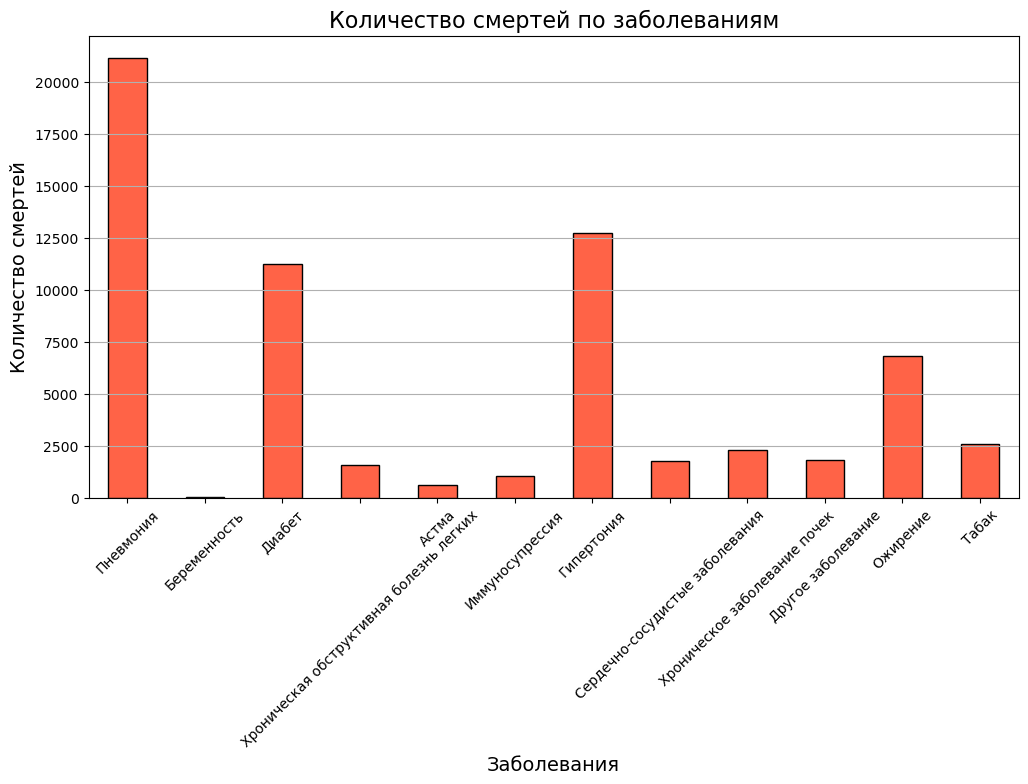

In [27]:
dead_patients = df[df['STATUS'] == 0]

conditions = {
    'Пневмония': 'PNEUMONIA',
    'Беременность': 'PREGNANT',
    'Диабет': 'DIABETES',
    'Хроническая обструктивная болезнь легких': 'COPD',
    'Астма': 'ASTHMA',
    'Иммуносупрессия': 'INMSUPR',
    'Гипертония': 'HIPERTENSION',
    'Сердечно-сосудистые заболевания': 'CARDIOVASCULAR',
    'Хроническое заболевание почек': 'RENAL_CHRONIC',
    'Другое заболевание': 'OTHER_DISEASE',
    'Ожирение': 'OBESITY',
    'Табак': 'TOBACCO'
}


death_counts = {condition: dead_patients[dead_patients[col] == 1].shape[0] for condition, col in conditions.items()}


death_counts_series = pd.Series(death_counts)


plt.figure(figsize=(12, 6))
ax = death_counts_series.plot(kind='bar', color='#ff6347', edgecolor='black')

plt.title('Количество смертей по заболеваниям', fontsize=16)
plt.xlabel('Заболевания', fontsize=14)
plt.ylabel('Количество смертей', fontsize=14)
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.show()


### Почему бы не попробовать сделать предсказание есть ли человек переболел пневмонией и гипертонией какой шанс что он умрет

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
X = df[['PNEUMONIA', 'HIPERTENSION']]
y = df['STATUS']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.isna().sum()

PNEUMONIA       0
HIPERTENSION    0
dtype: int64

In [32]:
print(y_train.unique()) # Should output [1, 0]
print(y_train.dtype) # Should output int64


[1 0]
object


#### y_train имеет тип object, так обучение не запустится

In [33]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [34]:
print(y_train.unique())
print(y_train.dtype)

[1 0]
int64


#### Теперь будет норм

In [35]:
print(y_train.value_counts())
print(y_test.value_counts())

STATUS
1    814417
0     24443
Name: count, dtype: int64
STATUS
1    203666
0      6049
Name: count, dtype: int64


### Видим, что у нас очень сильный дисбаланс в классах. Так что в model = LogisticRegression() нужно дописать class_weight='balanced'

In [36]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Accuracy: 0.8779057292039196
Confusion Matrix:
[[  4223   1826]
 [ 23779 179887]]
Classification Report:
              precision    recall  f1-score   support

           0       0.15      0.70      0.25      6049
           1       0.99      0.88      0.93    203666

    accuracy                           0.88    209715
   macro avg       0.57      0.79      0.59    209715
weighted avg       0.97      0.88      0.91    209715



### Все равно есть значительный дисбаланс. Нужно это исправить. Можешь почитать про SMOTE и подобные методы борьбы с дисбалансом данных

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

ModuleNotFoundError: No module named 'imblearn'